
# Project: Predicting Home Prices in Iowa 🏠

The goal of this project is to build a regression model that can predict the sale price of a house in Aimes, Iowa.

# Directions 


- **Task 1:** Import training data.
- **Task 2:** Create scatter plot.
- **Task 3:** Split data into feature matrix and target vector.
- **Task 4:** Split data into training and validation sets.
- **Task 5:** Establish baseline mean absolute error.
- **Task 6:** Build and train linear regression model.
- **Task 7:** Build and train ridge regression model.
- **Task 8:** Calculate mean absolute error for training and validation sets.
- **Task 9:** Calculate $R^2$ for validation set.
- **Task 10:** Make predictions based on test set.
- **Task 11:** Plot model coefficients.

**I will limit my code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn` 

# Tasks

## I. Wrangle Data

**Task 1:** Since real estate prices fluctuate over time, it's important to index the houses in this dataset using the year in which they were sold. First, load the dataset into a DataFrame named `df` and find the column that states the year sold. Next, modify the code below so that `Yr_Sold` column is parsed as a datetime object and set as the index.

In [ ]:
%%capture
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*

In [ ]:
from category_encoders import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
'''T1: Import data into DataFrame `df`.'''
import pandas as pd

url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train)
def wrangle():
    df = pd.read_csv(url_train,parse_dates=['Yr_Sold'],index_col='Yr_Sold')
    return df

In [ ]:
df=wrangle()
df.head()

,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,...,Roof_Matl,Roof_Style,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add
Yr_Sold,,,,,,,,,,,,,,,,,,,,,
2009-01-01,882,2,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,CompShg,Gable,124500,Normal,WD,Pave,5,AllPub,1956,1956
2009-01-01,1434,4,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,...,CompShg,Hip,157000,Normal,WD,Pave,7,AllPub,1974,1974
2009-01-01,2000,4,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,...,CompShg,Gable,345000,Normal,WD,Pave,9,AllPub,1972,1995
2009-01-01,945,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,CompShg,Gable,189500,Normal,WD,Pave,7,AllPub,1997,1997
2009-01-01,1008,4,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,CompShg,Gable,270000,Normal,WD,Pave,9,AllPub,2003,2003


**Task 2:** Create a scatter plot that shows `'SalePrice'` as a function of `'Gr_Liv_Area'`. 

Text(0, 0.5, 'Gr_Liv_Area')

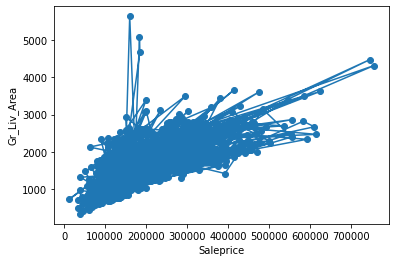

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['SalePrice'],df['Gr_Liv_Area'])
plt.plot(df['SalePrice'],df['Gr_Liv_Area'])
plt.xlabel('Saleprice')
plt.ylabel('Gr_Liv_Area')


## II. Split Data

**Task 3:** Since I am building a model to predict the price at which a house will be sold, my target is the `'SalePrice'` column. Split the DataFrame `df` into the target vector `y` and the feature matrix `X`. 

In [ ]:
'''T3: Split `df` into `X` and `y`.'''

target = 'SalePrice'

X= df.drop(columns=target)
y=df[target]

**Task 4:** Split `X` and `y` into training and validation sets. Since housing prices fluctuate over time, I will use the time-based cutoff method. 

- Training: Homes sold before 2009
- Validation: Homes sold during 2009

In [ ]:
'''T4: Split `X` and `y` into training, validation, and testing sets.'''

cutoff='2009'
mask=X.index<cutoff
X_train, y_train=X.loc[mask],y.loc[mask]
X_val, y_val=X.loc[~mask],y.loc[~mask]

## III. Set Baseline

**Task 5:** Before I can create a model to predict sale price, I need to establish a baseline. First, calculate the mean housing price for my training set. Next, calculate the *mean absolute error* for a model that always predicts that mean.

In [ ]:
'''T5: Calculate baseline mean absolute error.'''
from sklearn.metrics import mean_absolute_error

mean_y=y_train.mean()
y_pred=len(y_train)*[mean_y]
baseline_mae=mean_absolute_error(y_train,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 58502.9394639757


## IV. Build Models

**Task 6:** Build and train a linear regression model named `model_lr` that predicts home sale price. My model will have the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that I can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.


In [ ]:
df=df.drop(columns='SalePrice')

In [ ]:
'''T6: Build and train LinearRegression model.'''
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LinearRegression()
)
model_lr.fit(X_train, y_train);

**Task 7:** Build and train a ridge regression model named `model_r` that predicts home sales price. My model will include the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that I can compare my model coefficients after training.
- A `pipeline` that combines transformers and predictor.


In [ ]:
'''T7. Build and train Ridge model.'''
from sklearn.linear_model import Ridge

model_r=make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    Ridge(normalize=False),
)
model_r.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


## V. Check Metrics

**Task 8:** Compare my models by calculating their mean absolute error for the training and validation sets. I will assign these to the variables `model_lr_training_mae`, `model_lr_validation_mae`, `model_r_training_mae`, and `model_r_validation_mae`, respectively. The validation MAE for my Ridge model should be lower than my `baseline_mae`.

In [ ]:
'''T8: Compare model metrics, MAE.'''
model_lr_training_mae=mean_absolute_error(y_train,model_lr.predict(X_train))
model_lr_validation_mae=mean_absolute_error(y_val,model_lr.predict(X_val))
model_r_training_mae=mean_absolute_error(y_train,model_r.predict(X_train))
model_r_validation_mae=mean_absolute_error(y_val,model_r.predict(X_val))

print('Linear Regression Model')
print('Training MAE:', model_lr_training_mae)
print('Validation MAE:', model_lr_validation_mae)
print()
print('Ridge Regression Model')
print('Training MAE:', model_r_training_mae)
print('Validation MAE:', model_r_validation_mae)

Linear Regression Model
Training MAE: 16252.725113683535
Validation MAE: 1.0835239882409024e+16

Ridge Regression Model
Training MAE: 16119.822691743922
Validation MAE: 17986.919803129713


**Task 9:** Compare my two models by calculating their $R^2$ score for the **validation data**.

In [ ]:
'''T9: Compare model metrics, R^2.'''
model_lr_r2_score=model_lr.score(X_val,y_val)
model_r_r2_score=model_r.score(X_val,y_val)
print('Linear Regression R^2:', model_lr_r2_score)
print('Ridge Regression R^2:', model_r_r2_score)

Linear Regression R^2: -7.639381424191251e+24
Ridge Regression R^2: 0.888738016537792


**Task 10:** Based on the metrics above, choose the best of my two models and generate an array of predictions `y_pred` using the test set below.


In [ ]:
import numpy as np

In [ ]:
df.shape

(2564, 45)

In [ ]:
url_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'
X_test = pd.read_csv(url_test)
X_test.columns
X_test=X_test.drop(columns='Yr_Sold')
X_test.shape

(340, 45)

In [ ]:
alphas = np.arange(1.0, 20.5, 0.5)

train_mae =[]
test_mae = []

for a in alphas:
  model_r = make_pipeline(
      OneHotEncoder(use_cat_names=True),
      Ridge(alpha=a)
  )

  model_r.fit(X_train, y_train)
  train_mae.append(mean_absolute_error(y_train, model_r.predict(X_train)))

In [ ]:
y_pred = np.round(model_r.predict(X_test),2)
print('My predictions:', y_pred[:3])


My predictions: [203964.13  99228.29 164194.54]


In [ ]:
train_mae

[16571.419127004607,
 16666.820390691613,
 16737.082206762214,
 16790.294471081947,
 16830.26745235127,
 16860.791646525427,
 16884.927170639457,
 16904.48428049601,
 16920.507140065438,
 16933.76307347956,
 16945.01060829334,
 16956.690006874767,
 16967.24873648125,
 16976.43188204818,
 16984.823459226267,
 16992.917099371636,
 17001.768705863327,
 17010.622147459053,
 17018.742567204023,
 17026.136900835572,
 17033.06094530886,
 17040.22570759529,
 17047.378574507682,
 17054.73328813806,
 17062.373804939172,
 17069.80138743925,
 17076.971175233288,
 17083.84211802137,
 17090.51285723913,
 17097.298643926257,
 17104.16311818817,
 17110.927044483138,
 17117.438301048252,
 17124.06723401126,
 17130.82966756249,
 17137.526236129026,
 17144.30621909455,
 17151.43460682552,
 17158.72975420861]

## VI. Explain Model

**Task 11:** Create a horizontal barchart for my best performing model that shows the ten most important features for the model's predictions. 

In [ ]:
model_lr

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Bldg_Type', 'Central_Air', 'Condition_1',
                                     'Condition_2', 'Electrical', 'Exter_Cond',
                                     'Exter_Qual', 'Exterior_1st',
                                     'Exterior_2nd', 'Foundation', 'Functional',
                                     'Heating', 'Heating_QC', 'House_Style',
                                     'Kitchen_Qual', 'Land_Contour',
                                     'Land_Slope', 'Lot_Config', 'Lot_Shape',
                                     'MS_Zoning', 'Mas_Vnr_Type',
                                     'Neighborhood', 'Paved_Drive', 'Roof_Matl',
                                     'Roof_Style', 'Sale_Condition',
                                     'Sale_Type', 'Street', 'Utilities'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('linearregression', 

In [ ]:
coefficients = model_lr.named_steps['linearregression'].coef_[0]
features = model_lr.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)